In [1]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import tensorflow as tf

csvfile = "Data_training.csv"  #file name 
#csvfile = "Data_actor2000.pt.csv"  #file name 

In [2]:
data_test= pd.read_csv(csvfile)
data_test.head()

,Episode,Kick_Speed,friction,variance_friction,Rewards,Stop_Distance
0,0,45.04,0.7,0.3,0.00,7.48
1,1,44.27,0.7,0.3,-16.03,16.48
2,2,40.04,0.7,0.3,-52.84,28.87
3,3,31.59,0.7,0.3,-189.11,58.29
4,4,36.21,0.7,0.3,-80.87,42.64


In [3]:
profile = ProfileReport(data_test, minimal=True)
profile.to_file(output_file="output.html")

In [3]:
failed = data_test[data_test['Stop_Distance'] <= 5]
passed = data_test[data_test['Stop_Distance'] >5]

print('Size of crashes :',failed.shape[0])  
print('Size of success :',passed.shape[0]) 
print("Percentage of crash cases:{:.2f}".format(failed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")
print("Percentage of not crashed cases:{:.2f}".format(passed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")

failed.to_csv("crashed.csv",index=False)
failed.head()

Size of crashes : 365
Size of success : 4635
Percentage of crash cases:7.30 %
Percentage of not crashed cases:92.70 %


,Episode,Kick_Speed,friction,variance_friction,Rewards,Stop_Distance
5,5,52.61,0.7,0.3,-1025.57,-0.23
8,8,51.10,0.7,0.3,-1023.61,-0.22
10,10,51.93,0.7,0.3,-1024.97,-0.05
11,11,64.93,0.7,0.3,-1047.16,-0.36
12,12,47.04,0.7,0.3,-279.19,1.23


In [4]:
#passed.to_csv("not_crashed.csv",index=False  )
#passed.head()

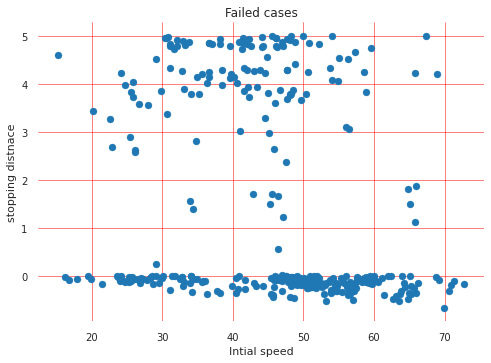

In [7]:
fig=plt.figure
plt.scatter(failed["Kick_Speed"],failed["Stop_Distance"],label='Line 2')
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Failed cases")
plt.xlabel("Intial speed")
plt.ylabel("stopping distnace")
plt.show()


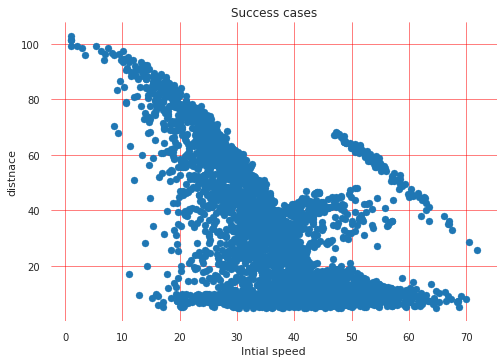

In [8]:
fig=plt.figure
plt.scatter(passed["Kick_Speed"],passed["Stop_Distance"])
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Success cases")
plt.xlabel("Intial speed")
plt.ylabel("distnace")
plt.show()


In [9]:
data_test.loc[data_test['Stop_Distance'] <= 0, 'test'] = int(1)
data_test.loc[data_test['Stop_Distance'] > 0, 'test'] = int(0)
data_test.head()

,Episode,Kick_Speed,friction,variance_friction,Rewards,Stop_Distance,test
0,0,45.04,0.7,0.3,0.00,7.48,0.0
1,1,44.27,0.7,0.3,-16.03,16.48,0.0
2,2,40.04,0.7,0.3,-52.84,28.87,0.0
3,3,31.59,0.7,0.3,-189.11,58.29,0.0
4,4,36.21,0.7,0.3,-80.87,42.64,0.0


Total number of episodes: 5000
Number of Pass: 1369
Number of fail: 31


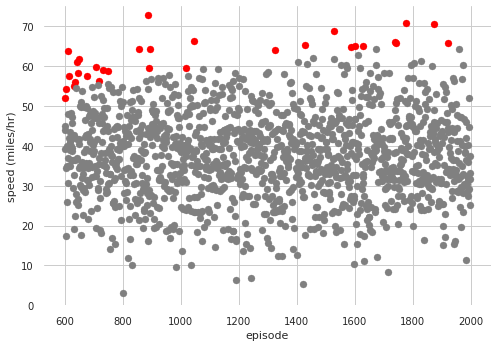

In [13]:
print('Total number of episodes:',data_test['Episode'].shape[0])
start=600
end=2000

fig, ax = plt.subplots()
episode=np.array(data_test['Episode'].values.tolist()[start:end])
test=np.array(data_test['test'].values.tolist()[start:end])
speed=np.array(data_test['Kick_Speed'].values.tolist()[start:end])

indices = test == 0
print('Number of Pass:',indices.sum())
print('Number of fail:',indices.shape[0]-indices.sum())

# normal values
ax.scatter(episode[~indices], speed[~indices], c = 'red',label='fail')
# bad values
ax.scatter(episode[indices], speed[indices], c = 'grey',label='Pass')
#ax.legend()
ax.set_ylim([0,75])
plt.xlabel('episode')
plt.ylabel('speed (miles/hr)')
ax.grid(True) 
plt.show()

In [14]:
crashed_final=pd.read_csv('crashed.csv') 
crashed_final=crashed_final.loc[crashed_final['Episode'] <= 50]
crashed_final=crashed_final['Kick_Speed'].values




In [15]:
for i in range(3) :
 print(crashed_final[-1-i])
print(crashed_final.shape[0])

69.94
57.01
47.57
15


Failures:  [23, 25, 17, 24, 25, 31, 10, 4, 4, 0, 2, 0, 0, 1, 1, 2, 2, 3, 1, 1]


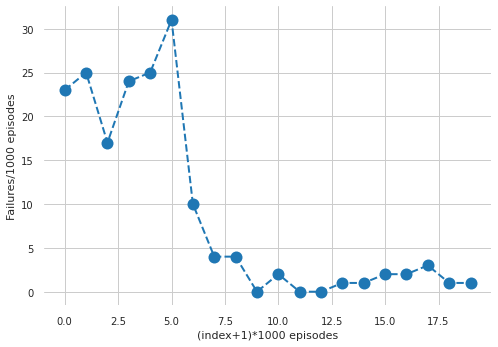

In [16]:
step=100
range_f=end/step
failure=[]
fig, ax = plt.subplots()
for i in range(int(range_f)):
    start=step*i
    episode=np.array(data_test['Episode'].values.tolist()[start:start+step])
    test=np.array(data_test['test'].values.tolist()[start:start+step])
    indices = test == 1
    failure.append(indices.sum())
print('Failures: ',failure)
ax.plot(failure,marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xlabel('(index+1)*1000 episodes')
plt.ylabel('Failures/1000 episodes')
ax.grid(True) 
plt.show()   

In [10]:
#data for AVF training:
iteration_start=600
iteration_end=2000
data=data_test[["Episode", "Kick_Speed","test"]][iteration_start:iteration_end]
std=np.std(data[["Episode", "Kick_Speed"]].values,axis=0)
mean=np.mean(data[["Episode", "Kick_Speed"]].values,axis=0)
np.savez('stdmean.npz',std=std, mean=mean)
data[["Episode", "Kick_Speed"]]=np.divide(np.subtract(data[["Episode", "Kick_Speed"]],mean),std)
print('std is:',std)
print('Mean is:',mean)
data.head()

std is: [404.14508533  10.99963159]
Mean is: [1299.5          38.00997857]


,Episode,Kick_Speed,test
600,-1.730814,0.537293,0.0
601,-1.728340,0.632750,0.0
602,-1.725865,0.117279,0.0
603,-1.723391,1.265499,1.0
604,-1.720917,-0.332736,0.0


In [13]:
#AVF Training 


X=data[["Episode","Kick_Speed"]].values
print(X.shape)
Y=data["test"]
print(Y.shape)
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

#test train split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X[1,:].shape)

#callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.997):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Model

model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(2,)), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid )
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=500, batch_size=8, callbacks=[callbacks]) ;


(1400, 2)
(1400,)
(2,)
Epoch 1/500
118/118 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9776
Epoch 2/500
118/118 [==============================] - 0s 2ms/step - loss: 0.1071 - accuracy: 0.9776
Epoch 3/500
118/118 [==============================] - 0s 2ms/step - loss: 0.0758 - accuracy: 0.9776
Epoch 4/500
118/118 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9776
Epoch 5/500
118/118 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9808
Epoch 6/500
118/118 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9829
Epoch 7/500
118/118 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9851
Epoch 8/500
118/118 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.9883
Epoch 9/500
118/118 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9915
Epoch 10/500
118/118 [==============================] - 0s 2ms/step 

In [14]:
results = model.evaluate(x_test, y_test, batch_size=16)
print('test loss, test acc:', results)

29/29 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000
test loss, test acc: [0.004547253251075745, 1.0]


In [15]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [16]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

my_model
assets	saved_model.pb	variables


In [17]:
new_model = tf.keras.models.load_model('saved_model/my_model')

(5000, 2)
Data : [[2000.           47.24378337]
 [2000.           49.23064169]
 [2000.           41.54551137]
 ...
 [2000.           20.9484816 ]
 [2000.           32.21236383]
 [2000.           49.57694064]]


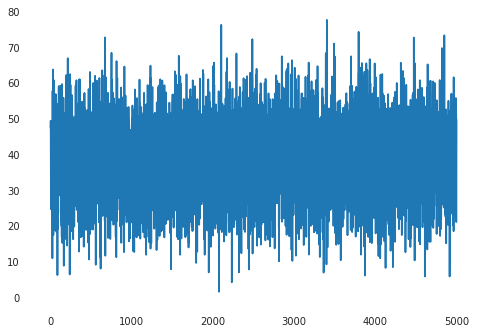

In [18]:
samples_per_iteration=5000
random_seed=np.random.randint(1,10000)
np.random.seed(random_seed)
candidate_initial_speed=[]
for i in range(samples_per_iteration): 
    #candidate_initial_speed =(9* np.random.randn(samples_per_iteration, 1) + 38).reshape(-1,1)
    candidate_initial_speed.append(np.random.normal(38,11))

candidate_initial_speed=np.array(candidate_initial_speed).reshape(-1,1)
Episode=2000*np.ones((samples_per_iteration,1)).reshape(-1,1)

data=np.concatenate((Episode,candidate_initial_speed),axis=1)
print(data.shape)
print('Data :',data)

container = np.load('stdmean.npz')
data_normalised=np.divide(np.subtract(data,container['mean']),container['std'])
plt.plot(candidate_initial_speed)

In [19]:
predicted_y=new_model.predict(data_normalised,batch_size=8)
max_value=np.amax(predicted_y)
print(max_value)
print(predicted_y.shape)
array_position=np.where(predicted_y==max_value)[0]
print(array_position)
#print(predicted_y)
#print(np.sort(predicted_y, axis=None) )
data_final=np.concatenate((data[array_position,:],predicted_y[array_position,:]),axis=1)
print(data_final)

0.99951375
(5000, 1)
[3403]
[[2.00000000e+03 7.74727185e+01 9.99513745e-01]]


In [74]:
data_final[0][1]

74.1494809483109